## Analysis on Video Game Sales CSV file

### Import csv and index by date column 

In [2]:
import pandas as pd

df = pd.read_csv('vgsales.csv', index_col="Rank")

### List some details on the data frame

In [3]:
df.describe()

Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.406443      0.264667      0.146652      0.077782      0.048063   
std        5.828981      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000

In [4]:
df.shape

(16598, 10)

### Get Top 5 games sorted by global sales

In [5]:
df.sort_values(by="Global_Sales", ascending=False).head(5)

Name Platform    Year         Genre Publisher  \
Rank                                                                      
1                   Wii Sports      Wii  2006.0        Sports  Nintendo   
2            Super Mario Bros.      NES  1985.0      Platform  Nintendo   
3               Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
4            Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                           
1        41.49     29.02      3.77         8.46         82.74  
2        29.08      3.58      6.81         0.77         40.24  
3        15.85     12.88      3.79         3.31         35.82  
4        15.75     11.01      3.28         2.96         33.00  
5        11.27      8.89     10.22         1.00         31.37

### Highest Global Sales by Year

In [6]:
idx = df.groupby(['Year'])['Global_Sales'].transform(max) == df['Global_Sales']
df[idx].sort_values(by="Year")

Name Platform    Year  \
Rank                                                                       
259                                           Asteroids     2600  1980.0   
240                                            Pitfall!     2600  1981.0   
90                                              Pac-Man     2600  1982.0   
422                                            Baseball      NES  1983.0   
10                                            Duck Hunt      NES  1984.0   
2                                     Super Mario Bros.      NES  1985.0   
128                                 The Legend of Zelda      NES  1986.0   
252                     Zelda II: The Adventure of Link      NES  1987.0   
23                                  Super Mario Bros. 3      NES  1988.0   
6                                                Tetris       GB  1989.0   
19                                    Super Mario World     SNES  1990.0   
232             The Legend of Zelda: A Link to the Past     SNES  1991.0   
51                   Super Mario Land 2: 6 Golden Coins       GB  1992.0   
58                                Super Mario All-Stars     SNES  1993.0   
72                                  Donkey Kong Country     SNES  1994.0   
188           Donkey Kong Country 2: Diddy's Kong Quest     SNES  1995.0   
5                              Pokemon Red/Pokemon Blue       GB  1996.0   
53                                         Gran Turismo       PS  1997.0   
31              Pokémon Yellow: Special Pikachu Edition       GB  1998.0   
13                          Pokemon Gold/Pokemon Silver       GB  1999.0   
133                             Pokémon Crystal Version       GB  2000.0   
29                               Gran Turismo 3: A-Spec      PS2  2001.0   
25                          Grand Theft Auto: Vice City      PS2  2002.0   
105                          Need for Speed Underground      PS2  2003.0   
18                        Grand Theft Auto: San Andreas      PS2  2004.0   
11                                           Nintendogs       DS  2005.0   
1                                            Wii Sports      Wii  2006.0   
14                                              Wii Fit      Wii  2007.0   
3                                        Mario Kart Wii      Wii  2008.0   
4                                     Wii Sports Resort      Wii  2009.0   
16                                   Kinect Adventures!     X360  2010.0   
30                       Call of Duty: Modern Warfare 3     X360  2011.0   
35                           Call of Duty: Black Ops II      PS3  2012.0   
17                                   Grand Theft Auto V      PS3  2013.0   
45                                   Grand Theft Auto V      PS4  2014.0   
34                            Call of Duty: Black Ops 3      PS4  2015.0   
222                                             FIFA 17      PS4  2016.0   
14393  Phantasy Star Online 2 Episode 4: Deluxe Package      PS4  2017.0   
5959                             Imagine: Makeup Artist       DS  2020.0   

              Genre                    Publisher  NA_Sales  EU_Sales  \
Rank                                                                   
259         Shooter                        Atari      4.00      0.26   
240        Platform                   Activision      4.21      0.24   
90           Puzzle                        Atari      7.28      0.45   
422          Sports                     Nintendo      0.73      0.10   
10          Shooter                     Nintendo     26.93      0.63   
2          Platform                     Nintendo     29.08      3.58   
128          Action                     Nintendo      3.74      0.93   
252       Adventure                     Nintendo      2.19      0.50   
23         Platform                     Nintendo      9.54      3.44   
6            Puzzle                     Nintendo     23.20      2.26   
19         Platform                     Nintendo     12.78      3.75  

### Highest Global Sales by Year Plotted

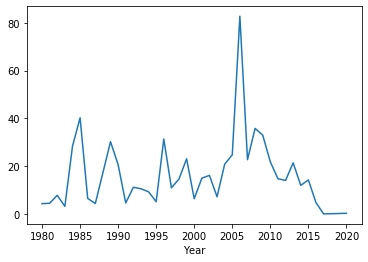

In [7]:
import matplotlib.pyplot as plt

df.groupby(['Year'])['Global_Sales'].max().plot()

### Sum of Global Sale by Year Plotted

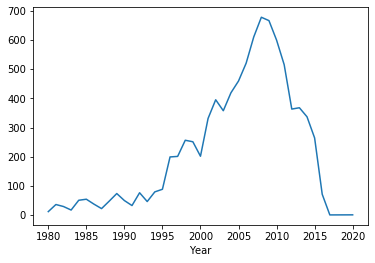

In [8]:
df.groupby(['Year'])['Global_Sales'].sum().plot()

### Sum of Global Sales by Platform

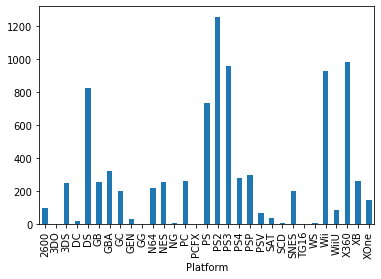

In [23]:
df.groupby(['Platform'])['Global_Sales'].sum().plot(kind='bar')

### Top selling game in each genre

In [27]:
idx = df.groupby(['Genre'])['Global_Sales'].transform(max) == df['Global_Sales']
df[idx].sort_values(by="Global_Sales",ascending=False)

Name Platform    Year         Genre  \
Rank                                                                      
1                             Wii Sports      Wii  2006.0        Sports   
2                      Super Mario Bros.      NES  1985.0      Platform   
3                         Mario Kart Wii      Wii  2008.0        Racing   
5               Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
6                                 Tetris       GB  1989.0        Puzzle   
8                               Wii Play      Wii  2006.0          Misc   
10                             Duck Hunt      NES  1984.0       Shooter   
11                            Nintendogs       DS  2005.0    Simulation   
17                    Grand Theft Auto V      PS3  2013.0        Action   
40               Super Smash Bros. Brawl      Wii  2008.0      Fighting   
51    Super Mario Land 2: 6 Golden Coins       GB  1992.0     Adventure   
166                      Pokemon Stadium      N64  1999.0      Strategy   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank                                                                    
1                 Nintendo     41.49     29.02      3.77         8.46   
2                 Nintendo     29.08      3.58      6.81         0.77   
3                 Nintendo     15.85     12.88      3.79         3.31   
5                 Nintendo     11.27      8.89     10.22         1.00   
6                 Nintendo     23.20      2.26      4.22         0.58   
8                 Nintendo     14.03      9.20      2.93         2.85   
10                Nintendo     26.93      0.63      0.28         0.47   
11                Nintendo      9.07     11.00      1.93         2.75   
17    Take-Two Interactive      7.01      9.27      0.97         4.14   
40                Nintendo      6.75      2.61      2.66         1.02   
51                Nintendo      6.16      2.04      2.69         0.29   
166               Nintendo      3.18      1.24      0.94         0.09   

      Global_Sales  
Rank                
1            82.74  
2            40.24  
3            35.82  
5            31.37  
6            30.26  
8            29.02  
10           28.31  
11           24.76  
17           21.40  
40           13.04  
51           11.18  
166           5.45

### Publishers sorted by sum of global sales - (incomplete)

In [30]:
df.groupby(['Publisher'])['Global_Sales'].sum()

Publisher
10TACLE Studios                  0.11
1C Company                       0.10
20th Century Fox Video Games     1.94
2D Boy                           0.04
3DO                             10.12
                                ...  
id Software                      0.03
imageepoch Inc.                  0.04
inXile Entertainment             0.10
mixi, Inc                        0.86
responDESIGN                     0.13
Name: Global_Sales, Length: 578, dtype: float64